# Détectez des faux billets avec R ou Python

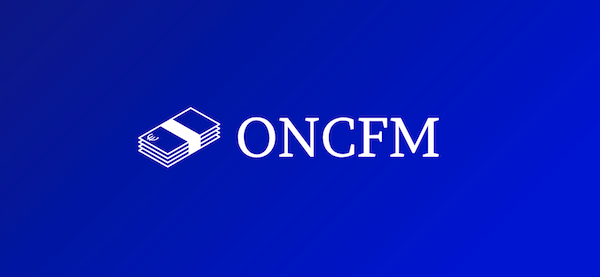

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import cluster
from sklearn import metrics

## Importation des données

In [2]:
df_bills = pd.read_csv('billets.csv', sep=";")

## QC de données

In [3]:
df_bills

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
df_bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df_bills.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
print(df_bills.isna().sum())#remplacer par régression linéaire

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


## Régression linéaire 

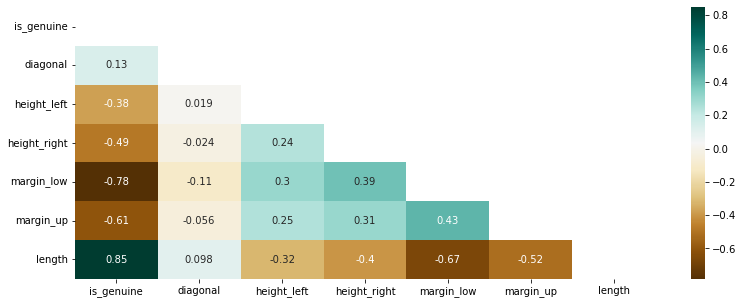

In [7]:
# Calculate pairwise-correlation
matrix = df_bills.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [8]:
df_na = df_bills[df_bills.isna().any(axis=1)]
df_bills=df_bills.dropna()
df_bills.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [9]:
df_na.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [10]:
x1 = df_bills.loc[:,['length']]
y1 = df_bills.loc[:,['margin_low']]

model = smf.ols('margin_low~length', data=df_bills).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          8.98e-189
Time:                        10:23:24   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

In [11]:
x_test = df_na['length']
y_pred = model.predict(x_test)
#Lets replace only the missing values
df_na.margin_low.fillna(y_pred, inplace=True)

/var/folders/8r/smt5ckys0519pyn9fb5hcv6h0000gn/T/ipykernel_4459/3914071797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na.margin_low.fillna(y_pred, inplace=True)


In [12]:
df_bills = pd.concat([df_bills, df_na])
print(df_bills.isna().sum())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [13]:
df_bills.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.484070,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659079,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.315000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


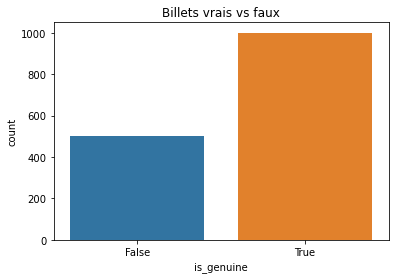

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_bills, x='is_genuine')
plt.title('Billets vrais vs faux')
plt.show()

In [15]:
df_bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [16]:
X = df_bills.drop(['is_genuine'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05453333, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08379753, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1275996 , -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.82207598,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  0.9296934 ,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.91430749,  0.38201544,
        -1.36227312]])

## Feature engineering

In [17]:
pca = PCA(n_components=6)
X_projected = pca.fit_transform(X_scaled)
X_Projected = pd.DataFrame(X_projected, index=df_bills.index)
X_Projected.head()

,0,1,2,3,4,5
0,1.641391,0.750581,2.425864,3.169559,0.237131,0.011454
1,-2.020753,-2.207183,-0.999841,0.083404,0.042411,-0.479282
2,-0.969606,2.620244,1.183687,-0.949782,-0.829001,0.195992
3,-1.379133,-1.816936,0.661800,0.838972,0.785410,-0.222652
4,0.149701,-0.567509,0.848608,-1.770835,1.207041,-0.303505


In [18]:
f1 = pca.components_[0] #f1 combinaison linéaire des autres variables
print(f1)

[-0.08440101  0.33067785  0.39301126  0.50686958  0.4397274  -0.52800929]


In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.43223483, 0.60179582, 0.73209037, 0.8504483 , 0.94709694,
       1.        ])

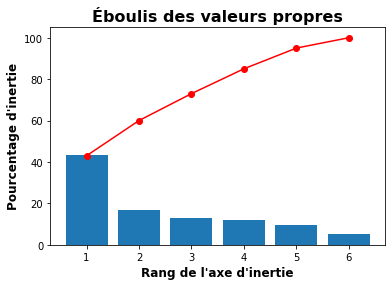

In [20]:
n_components = 6
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", fontsize=12, y=1, weight='bold')
plt.ylabel("Pourcentage d'inertie", fontsize=12, y=0.5, weight='bold')
plt.title("Éboulis des valeurs propres", fontsize=16, y=1, weight='bold')
plt.show(block=False)

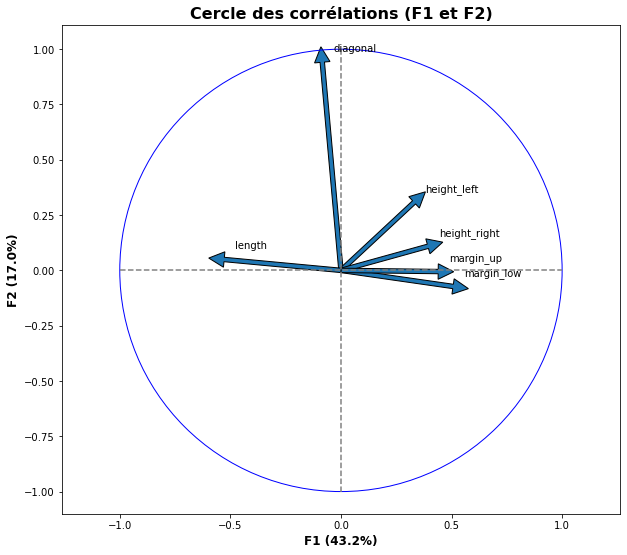

In [21]:
features = X.columns
features
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel("F{} ({}%)".format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize=12, y=1, weight='bold')
plt.ylabel("F{} ({}%)".format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize=12, y=0.5, weight='bold')

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize=16, y=1, weight='bold')


an = np.linspace(0, 2 * np.pi, 100)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [22]:
n_components=3
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(X_scaled)

for i in range(0, n_components): 
    df_bills['PC' + str(i + 1)] = reduced[:, i]
df_bills

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2,PC3
0,True,171.81,104.86,104.95,4.520000,2.89,112.83,1.641391,0.750581,2.425864
1,True,171.46,103.36,103.66,3.770000,2.99,113.09,-2.020753,-2.207183,-0.999841
2,True,172.69,104.48,103.50,4.400000,2.94,113.16,-0.969606,2.620244,1.183687
3,True,171.36,103.91,103.94,3.620000,3.01,113.51,-1.379133,-1.816936,0.661800
4,True,171.73,104.28,103.46,4.040000,3.48,112.54,0.149701,-0.567509,0.848608
...,...,...,...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.228390,2.93,111.21,1.297679,0.912309,1.113792
1315,False,172.08,104.15,104.17,4.680984,3.40,112.29,1.259107,0.533103,-0.269326
1347,False,171.72,104.46,104.12,5.684562,3.61,110.31,4.009625,-0.502623,0.253596
1435,False,172.66,104.33,104.41,5.096607,3.56,111.47,2.706870,2.491868,-0.801984


In [23]:
reduced

array([[ 1.64139112,  0.75058147,  2.42586388],
       [-2.0207526 , -2.20718269, -0.99984146],
       [-0.96960563,  2.62024403,  1.18368702],
       ...,
       [ 4.00962488, -0.50262334,  0.25359552],
       [ 2.7068697 ,  2.49186826, -0.80198404],
       [ 2.08989006,  0.06536535,  0.20635798]])

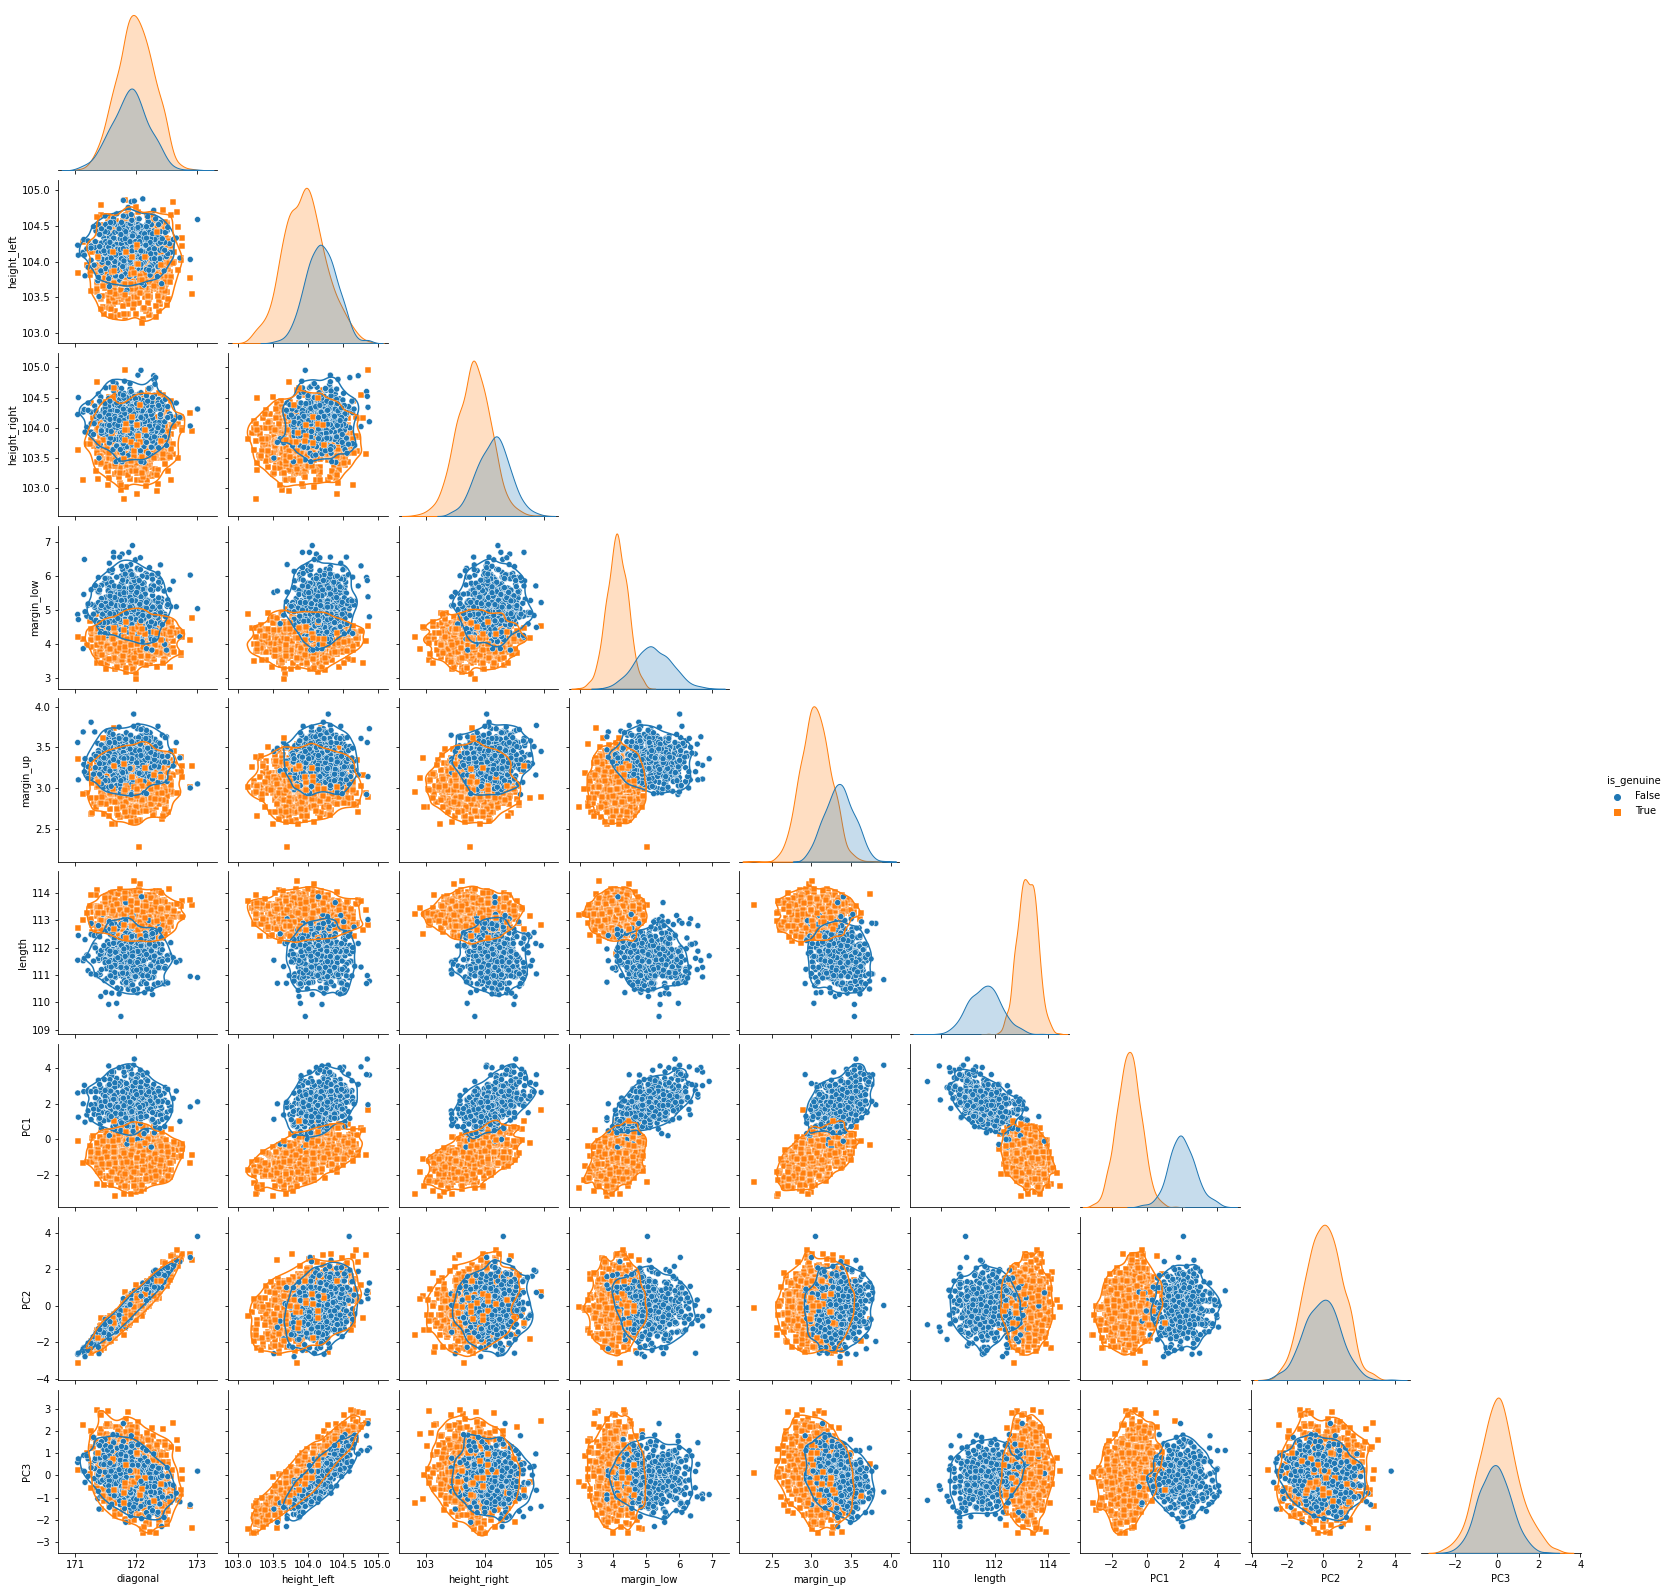

In [24]:
gen = sns.pairplot(df_bills, hue='is_genuine', markers=['o','s'], corner=True)
gen.map_lower(sns.kdeplot, levels=2, color='.3')
plt.show()

## K-Means

In [25]:
kmeans = sk.cluster.KMeans(n_clusters=2, random_state=0).fit(X_Projected)
df_bills['cluster'] = kmeans.predict(X_Projected)
dicto = {0: 1, 1: 0} # Inversion des 0 et des 1
df_bills['cluster'] = df_bills['cluster'].map(dicto) # Pour que 0 soit égal à False
df_bills

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2,PC3,cluster
0,True,171.81,104.86,104.95,4.520000,2.89,112.83,1.641391,0.750581,2.425864,0
1,True,171.46,103.36,103.66,3.770000,2.99,113.09,-2.020753,-2.207183,-0.999841,1
2,True,172.69,104.48,103.50,4.400000,2.94,113.16,-0.969606,2.620244,1.183687,1
3,True,171.36,103.91,103.94,3.620000,3.01,113.51,-1.379133,-1.816936,0.661800,1
4,True,171.73,104.28,103.46,4.040000,3.48,112.54,0.149701,-0.567509,0.848608,1
...,...,...,...,...,...,...,...,...,...,...,...
1303,False,172.17,104.49,103.76,5.228390,2.93,111.21,1.297679,0.912309,1.113792,0
1315,False,172.08,104.15,104.17,4.680984,3.40,112.29,1.259107,0.533103,-0.269326,0
1347,False,171.72,104.46,104.12,5.684562,3.61,110.31,4.009625,-0.502623,0.253596,0
1435,False,172.66,104.33,104.41,5.096607,3.56,111.47,2.706870,2.491868,-0.801984,0


In [26]:
X_Projected.head()

,0,1,2,3,4,5
0,1.641391,0.750581,2.425864,3.169559,0.237131,0.011454
1,-2.020753,-2.207183,-0.999841,0.083404,0.042411,-0.479282
2,-0.969606,2.620244,1.183687,-0.949782,-0.829001,0.195992
3,-1.379133,-1.816936,0.661800,0.838972,0.785410,-0.222652
4,0.149701,-0.567509,0.848608,-1.770835,1.207041,-0.303505


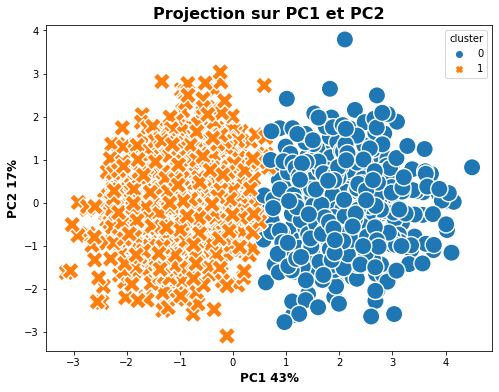

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_bills, x='PC1', y='PC2', hue='cluster', style='cluster', s=300)
plt.xlabel("PC1 43%", fontsize=12, y=1, weight='bold')
plt.ylabel("PC2 17%", fontsize=12, y=0.5, weight='bold')
plt.title("Projection sur PC1 et PC2", fontsize=16, y=1, weight='bold')
plt.show()

In [28]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)

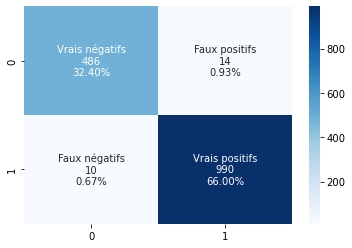

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       500
        True       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [29]:
matrice_confusion(df_bills['is_genuine'], df_bills['cluster'], 'kmeans_matrice-confusion')

### Split en train-test

In [30]:
y = df_bills['is_genuine'] # Target
y
#Split ici
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    reduced, y, test_size=0.2, random_state=42)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1200 lignes 
y_train : 1200 lignes 
X_test : 300 lignes 
y_test : 300 lignes


In [31]:
X_test

array([[ 1.36415785,  1.40472413, -0.8776753 ],
       [ 1.45468929, -1.02436873,  0.48690969],
       [ 0.0637303 , -0.84365789,  1.88025473],
       [-0.58255035, -0.40463891,  1.64849321],
       [-0.69602736, -1.5229172 ,  0.58065614],
       [-0.04500888, -0.6001728 ,  0.62129524],
       [ 2.67852726,  0.53511501, -0.19932775],
       [-1.07811871, -1.55031702, -0.33307147],
       [ 1.92325978,  0.72809014,  0.1958161 ],
       [-0.7963724 ,  0.63500903,  0.14689942],
       [-0.35277298, -0.22797958, -0.93316483],
       [ 2.70308989,  1.74560977,  0.32335142],
       [-0.11418604, -3.09611471,  0.25195925],
       [ 1.60026725, -2.42888403, -0.04374381],
       [-1.18238915, -0.70356717,  0.03664965],
       [ 2.25075477, -1.72976581,  0.10421509],
       [-1.03197383,  0.41020967,  0.99828419],
       [-1.79675416, -0.3011104 , -0.52071206],
       [-1.34774536, -1.31073186,  0.61008915],
       [-1.32879447, -0.12512361, -0.96763941],
       [ 1.40766675, -0.73246394, -0.534

## Regression logistique

In [32]:
regression = sk.linear_model.LogisticRegression()
regression.fit(X_train, y_train)

Proba = pd.DataFrame(
    regression.predict_proba(X_test)).rename(
    columns={0: 'False', 1: 'True'})
Proba.head(10)

,False,True
0,0.983752,0.016248
1,0.980943,0.019057
2,0.016823,0.983177
3,0.001040,0.998960
4,0.003909,0.996091
5,0.042653,0.957347
6,0.999927,0.000073
7,0.002228,0.997772
8,0.996257,0.003743
9,0.001584,0.998416


In [33]:
y_log = regression.predict(X_test) # Prédictions sur l'échantillon-test
print(y_log)

[False False  True  True  True  True False  True False  True  True False
  True False  True False  True  True  True  True False False False  True
 False  True False  True False False False  True False False  True  True
  True  True False  True False  True False  True False  True  True  True
  True False  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True False False  True False False  True
  True  True False  True False  True False False  True  True  True False
  True  True  True False  True  True  True  True  True  True  True False
 False False False  True  True False False  True False  True False  True
 False False  True  True  True  True False  True False  True  True  True
  True False  True False  True  True False False  True  True  True False
 False  True  True  True  True  True False False  T

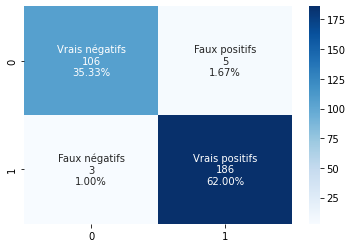

              precision    recall  f1-score   support

       False       0.97      0.95      0.96       111
        True       0.97      0.98      0.98       189

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [34]:
matrice_confusion(y_test, y_log, 'reg_matrice-confusion')

## Courbe R.O.C.

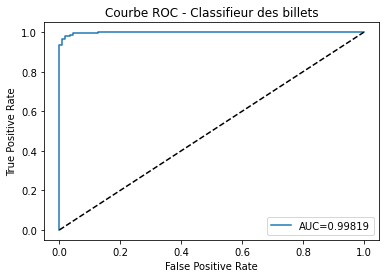

In [35]:
#Metrics
y_pred_proba = regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Courbe R.O.C.
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Courbe ROC - Classifieur des billets')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(["AUC="+ str(round(auc,5))])
plt.show()

### Modelisation

In [36]:
new = pd.read_csv('billets_production.csv', sep=",")
new.set_index("id", inplace=True)
new

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [37]:
n_components=3
pca = PCA(n_components=n_components)
X_new = scaler.fit_transform(new)
X_new_p = pca.fit_transform(X_new)
X_New = pd.DataFrame(X_new_p, index=new.index)
Final = pd.DataFrame(
    regression.predict_proba(X_New)).rename(
    columns={0: 'False', 1: 'True'})
Final["y_pred"] = (Final["True"] >= 0.5).astype(int)
print("Indetification des billets:")
for i, k in zip(Final["y_pred"],X_New.index):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

Indetification des billets:
Le billet A_1 est vrai
Le billet A_2 est vrai
Le billet A_3 est faux
Le billet A_4 est faux
Le billet A_5 est vrai
